# Предисловие

Для хорошего решения необходимо понимать, как устроен датасет. Чем больше информации, тем лучше. При этом по названию колонок некоторые выводы сделать не получается (например, что означает колонка "Administrative"?). При этом понятно, что, скорее всего, датасет взят с Kaggle, либо он там присутствует, поэтому я загуглил и нашел информацию о нем. Там же есть ноутбуки с анализом датасета, но я код оттуда использовать не буду (тем более, там ребята в основном решают задачи кластеризации, и если и используют классификаторы, то явно не CatBoost, который предпочту использовать я).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Обработка и анализ данных

### 1.1 Посмотрим, что у нас вообще за датасет

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Все колонки, кроме месяца и VisitorType, закодированы как числа или бинарные величины. При этом явно некоторые из них должны быть категориальными по смыслу (например, регион). Посмотрим на описание колонок и на основе этого поймем, каких из них - категориальные (**Описания признаков разместил в самом конце блокнота**):

Делаем вывод (на основе распределений данных, описаний колонок, и здравого смысла), что к нечисловым факторам относятся:

- SpecialDay
- Month
- OperatingSystems
- Browser
- Region
- TrafficType
- VisitorType
- Weekend

То есть все последние колонки :)

Из этих колонок SpecialDay означает, насколько мы близко к празднику, а Weekend - булевая. Остальные будем подавать как категориальные. В CatBoost делается умный target encoding, который предотвращает лики данных (в отличие от обычного target encoding). Поэтому явно лучше использовать его, чем OHE или LabelEncoder.

In [6]:
cat_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']

# преобразуем bool в числа
df.Weekend = df.Weekend.astype(int)
df.Revenue = df.Revenue.astype(int)

### 1.2 Проверка на пустые значения и сбалансированность классов

In [7]:
df.Revenue.value_counts() 

0    10422
1     1908
Name: Revenue, dtype: int64

Датасет не является сбалансированным, будем иметь это в виду. Это означает, что модели будет выгоднее предсказывать нулевой класс, то есть пользователь не совершил покупку. Способы борьбы с этим:

1) UnderSampling / OverSampling. Не очень уважаемые методы, так как в UnderSampling мы теряем данные, что не есть хорошо, а в OverSampling мы просто дублируем значения какое-то количество раз. Явно можно придумать что-то умнее

2) Генерация синтетических объектов с помощью SMOTE или его аналогов. Мне не кажется, что у нас настолько сильный дисбаланс классов, чтобы прибегать к этому методу + некоторые исследователи говорят, что на практике не так уж это и помогает

3) Веса классов. Этот вариант кажется самым компромиссным и подходящим в нашем случае, поэтому его и будем использовать. В CatBoost это можно настроить автоматически.

In [8]:
df.isnull().sum() / len(df) # все ок, пустых значений нет

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

### 1.3 Более детальный анализ

In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


Посмотрим на распределения непрерывных величин

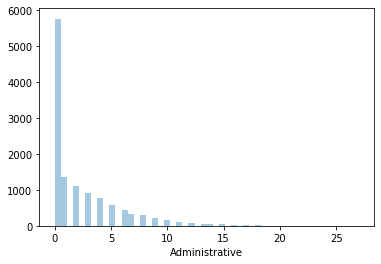

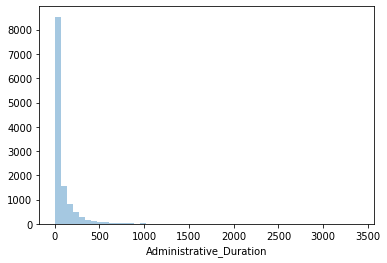

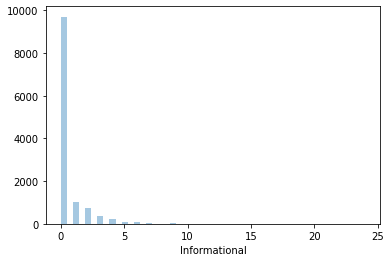

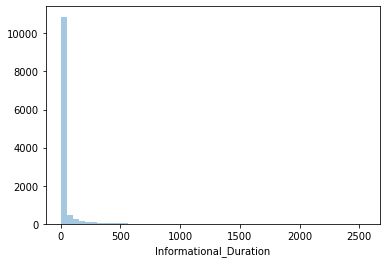

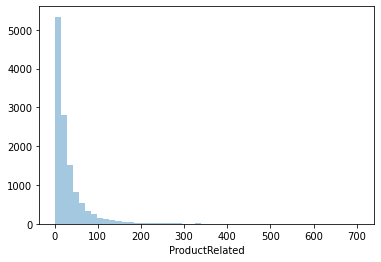

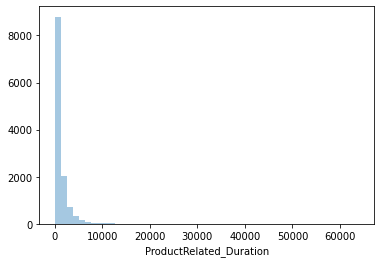

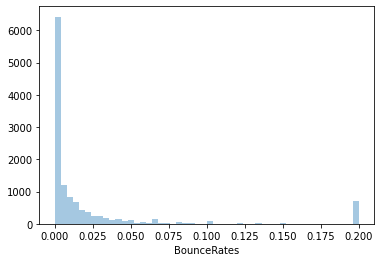

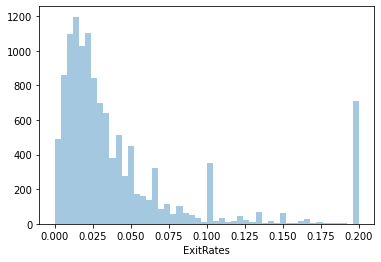

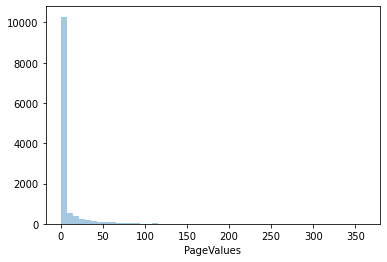

In [10]:
continuous_features = ['Administrative', 'Administrative_Duration',
                      'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', 'PageValues']

for feature in continuous_features:
    sns.distplot(df[feature], kde=False)
    plt.show()

Распределения факторов BounceRates и ExitRates выглядят немного странно, все остальные распределены неплохо. При этом, судя по описанию, эти признаки в явном виде считаются, и там вряд ли допущены ошибки. Учитывая то, что в основном признаки распределены адекватно, и древовидные модели в целом не очень чувствительны к выбросам, предлагаю не делать дополнительную обработку признаков. Датасет выглядит очень аккуратным, как будто его уже тщательно предобработали за нас (что бывает редко).

# 2 Выдвижение гипотез

На основе признакового описания выдвигаю следующие продуктовые гипотезы:

1) В выходные покупки делаются более часто, как и в 'special day'. У людей больше свободного времени, и они менее загружены работой и всем в этом роде

2) Высокие значения ProductRelated и ProductRelated_Duration указывают на заинтересованность пользователя, поэтому есть положительная корреляция

3) В какие-то месяцы более высокие покупки (например, в декабре или марте), а в какие-то все более спокойно (например, в январе или апреле), то есть наблюдается сезонность

4) BounceRates и ExitRates тоже являются важными факторами, так как они должны показывать качество страницы

5) TrafficType (подробнее можно почитать здесь - https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics) и VisitorType влияют на таргет, так как это непосредственно показывает заинтересованность пользователя

6) PageValues - безусловно важный фактор, так как этот признак говорит о распределении таргета на этой конкретной странице

7) Не все факторы важны (например, OperatingSystems и Browser не влияют на таргет).

Summary гипотез: У нас есть важные признаки, отображающие сезонность, заинтересованность пользователей, качество страницы, и.т.д, а есть неважные признаки.

Протестируем гипотезы, пока не используя ML.

### 2.1 Проверим гипотезу 1)

In [11]:
# смотрим на процентные соотношения классов по группам
freq_df = df.groupby(['SpecialDay'])['Revenue'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df
# гипотеза о том, что в "Special days" более часто совершаются покупки отвергается, что достаточно странно
# Потом на матрице корреляций мы увидим отрицательную корреляцию между SpecialDay и Revenue

Revenue,0,1
SpecialDay,,
0.0,0.834732,0.165268
0.2,0.921348,0.078652
0.4,0.946502,0.053498
0.6,0.917379,0.082621
0.8,0.966154,0.033846
1.0,0.935065,0.064935


In [12]:
freq_df = df.groupby(['Weekend'])['Revenue'].value_counts().unstack()
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df
# а вот в выходные пользователи доходят до покупок чуть чаще

Revenue,0,1
Weekend,,
0,0.851089,0.148911
1,0.826011,0.173989


### 2.2 Построим матрицу корреляций и проверим гипотезы

При этом будем иметь в виду, что, хоть у нас признаки и закодированы в виде чисел, но все из них реально числовые, поэтому корреляцию будем смотреть на том, на чем реально имеет смысл ее смотреть.

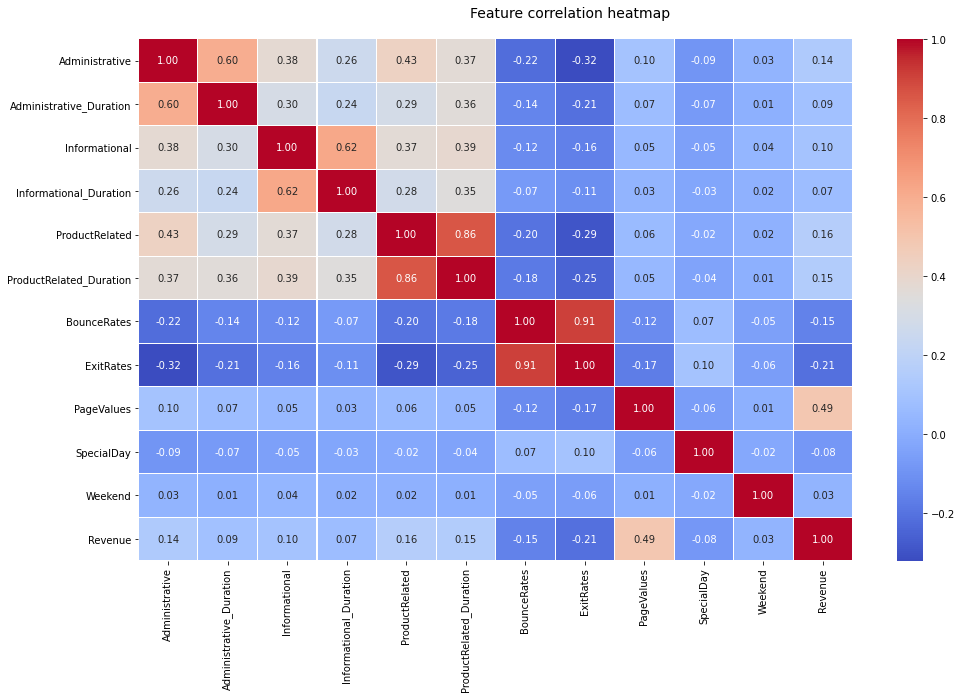

In [13]:
df_partial_cols = df[['Administrative', 'Administrative_Duration', 'Informational',
                     'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                     'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend', 'Revenue']]
f, ax = plt.subplots(figsize = (10, 6))
corr = df_partial_cols.corr()
hm = sns.heatmap(round(corr,2), annot = True, ax = ax, cmap = "coolwarm", fmt = '.2f', linewidths = .05)
f.subplots_adjust(top = .93)
t = f.suptitle('Feature correlation heatmap', fontsize = 14)
plt.gcf().set_size_inches(16, 9)

Выводы на основе матрицы корреляций: самым важным признаков оказался PageValues (я уже объяснял, почему это может быть так). Далее видим отрицательную корреляцию между таргетом и BounceRates, ExitRates, и положительную корреляцию с факторами ProductRelated, ProductRelated_Duration, что в принципе соответствует выдвинутым мной гипотезам 2) и 4). Остальные корреляции с таргетом совсем уж незначительные. Тут стоит сделать оговорку, что по модулю корреляции (за исключением с PageValues) достаточно слабые. При этом, так как у нас большой массив данных, содержательные выводы о влиянии этих признаков на таргет мы все равно можем сделать. Также у нас есть проблема мультиколлинеарности, но это является большой проблемой лишь в случае линейных моделей, которые мы не будем трогать.

Таким образом, с помощью матрицы корреляций мы проверили гипотезы 2), 4), 6) - все из них не отвергаются.

### 2.3 Проверим сезонность с помощью back-to-back bar plot (гипотеза 3)

In [14]:
freq_df = df.groupby(['Month'])['Revenue'].value_counts().unstack()
freq_df.columns = ['Revenue_0', 'Revenue_1']
freq_df

,Revenue_0,Revenue_1
Month,,
Aug,357,76
Dec,1511,216
Feb,181,3
Jul,366,66
June,259,29
Mar,1715,192
May,2999,365
Nov,2238,760
Oct,434,115


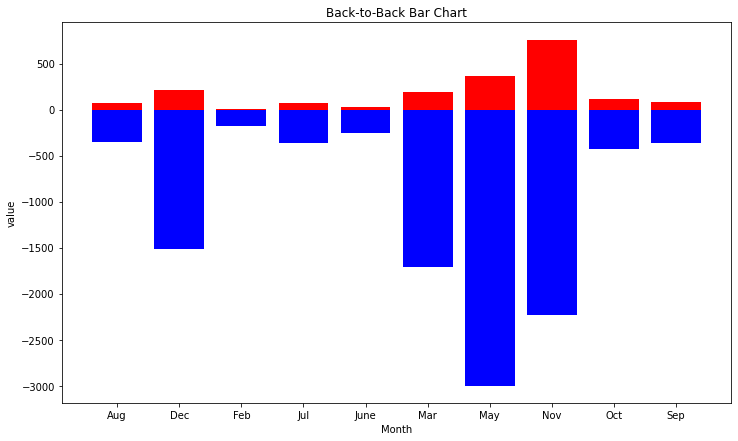

In [15]:
X = freq_df.index
A = freq_df['Revenue_1'].tolist()
B = freq_df['Revenue_0'].tolist()
B = [i * -1 for i in B]

plt.bar(X, A, color = 'r')
plt.bar(X, B, color = 'b')
plt.title("Back-to-Back Bar Chart")
plt.xlabel('Month')
plt.ylabel('value')
plt.gcf().set_size_inches(12, 7)
plt.show()

Красным показано количество revenue = 1, синим - revenue = 0 (нужно смотреть на модуль значений). Видно, что какие-то месяцы точно удачнее других (например, ноябрь точно лучше мая в плане продаж, а в феврале как будто покупок вообще ждать не стоит). Таким образом, гипотеза о наличии сезонности не отвергается.

### 2.4 Проверим гипотезу 5)

In [16]:
freq_df = df.groupby(['TrafficType'])['Revenue'].value_counts().unstack().fillna(0)
freq_df

Revenue,0,1
TrafficType,,
1,2189.0,262.0
2,3066.0,847.0
3,1872.0,180.0
4,904.0,165.0
5,204.0,56.0
6,391.0,53.0
7,28.0,12.0
8,248.0,95.0
9,38.0,4.0


На абсолютные значения смотреть не имеет смысла, так как они не информативны. Посмотрим процентное соотношение положительной выручки к общей численности наблюдений с этими трафиками, и расположим это на столбчатой диаграмме. Так как у нас нет декодировки трафиков, содержательные выводы сделать не сможем, но сможем понять, есть ли трафики, которые сильнее других влияют на покупку.

In [17]:
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)
pct_df.columns = ['Revenue_0', 'Revenue_1']
pct_df

,Revenue_0,Revenue_1
TrafficType,,
1,0.893105,0.106895
2,0.783542,0.216458
3,0.912281,0.087719
4,0.845650,0.154350
5,0.784615,0.215385
6,0.880631,0.119369
7,0.700000,0.300000
8,0.723032,0.276968
9,0.904762,0.095238


Text(0.5, 1.0, 'Check which trafics are more profitable')

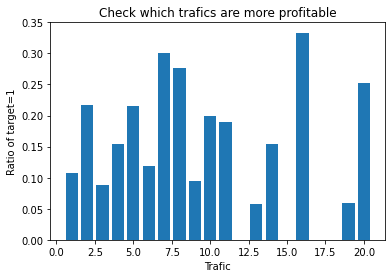

In [18]:
plt.bar(pct_df.index.tolist(), pct_df.Revenue_1.tolist())
plt.xlabel('Trafic')
plt.ylabel('Ratio of target=1')
plt.title('Check which trafics are more profitable')

Получается, какие-то трафики больше говорят о вероятной покупке, чем другие.

In [19]:
freq_df = df.groupby(['VisitorType'])['Revenue'].value_counts().unstack()
freq_df.columns = ['Revenue_0', 'Revenue_1']
freq_df

,Revenue_0,Revenue_1
VisitorType,,
New_Visitor,1272,422
Other,69,16
Returning_Visitor,9081,1470


Интересное наблюдение: примерно 25% новых пользователей делают покупку. При этом больше собрано статистики по пользователям, которые вернулись, и вернувшиеся пользователи почему-то совершают покупки не так часто. Визуально это выглядит примерно так:

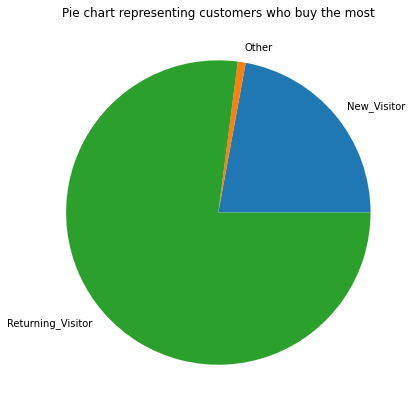

In [20]:
fig = plt.figure(figsize =(10, 7))
plt.pie(freq_df.Revenue_1.tolist(), labels=freq_df.index.tolist())
plt.title('Pie chart representing customers who buy the most')
plt.show()

Гипотеза 5) не отвергается. Гипотезу 7) проверим уже на этапе построения классификатора, посмотрев на feature_importances.

# 3 Обучение классификатора

### 3.1 Почему использование CatBoost имеет смысл, и почему я выбрал эту модель?

1) Много данных. Несколько тысяч наблюдений, как правило, достаточно для бустинга. У нас же данных еще больше

2) Не так много пространства для переобучения, в силу незашумленности данных и небольшом количестве признаков

3) Много категориальных признаков, которые хорошо обрабатываются с помощью CatBoost.

### 3.2 Целевая метрика при обучении модели

Мы хотим понять, какие действия могут привести к конверсии. На это можно смотреть таким образом: если модель выдает прогноз 1, то мы хотим быть уверенными в ее правильности, то есть нужно смотреть на precision. При этом тут может быть следующая проблема: модель может выдавать прогноз 1 только для объектов, в которых она очень уверена. Тогда precision будет высокий, но мы не сможем ничего нормального проанализировать, так как почти не распознаем нужные объекты, то есть будет маленький recall. Поэтому я бы смотрел на некий баланс между этими двумя метриками, и f1 мера хорошо под это подойдет. Предлагаю ее и выбрать в качестве целевой метрики.

### 3.3 Процесс обучения

Несмотря на то, что не все признаки кажутся важными, мы все же обучим модель со всеми признаками. Из-за того, что данные не зашумлены, и признаков в принципе немного, это не должно негативно сказаться на качестве. Данные разделим на трейн, валидацию, и тест, и поставим автобаланс классов. Несмотря на то, что мы выбрали ключевую метрику, качество будем замерять сразу на большом количестве метрик. Это позволит оценить модель со всех сторон.

In [21]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

cat_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']
# 70% на трейн, 15 на тест и 15 на валидацию
train, test = train_test_split(
    df, 
    test_size=0.3, 
    stratify=df['Revenue'], 
    random_state=42
)

val, test = train_test_split(
    test, 
    test_size=0.5, 
    stratify=test['Revenue'], 
    random_state=42
)

In [22]:
X_train = train.drop('Revenue', axis=1)
y_train = train[['Revenue']]

X_val = val.drop('Revenue', axis=1)
y_val = val[['Revenue']]

X_test = test.drop('Revenue', axis=1)
y_test = test[['Revenue']]

pool_train = Pool(X_train, y_train, cat_features=cat_features)
pool_val = Pool(X_val, y_val, cat_features=cat_features)
pool_test = Pool(X_test, cat_features=cat_features)

In [23]:
model = CatBoostClassifier(metric_period=50, random_state=42, auto_class_weights='Balanced')
model.fit(pool_train, eval_set=pool_val, early_stopping_rounds=50, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.053965
0:	learn: 0.6518172	test: 0.6560393	best: 0.6560393 (0)	total: 71.8ms	remaining: 1m 11s


50:	learn: 0.3195952	test: 0.3613733	best: 0.3613733 (50)	total: 369ms	remaining: 6.86s
100:	learn: 0.2979229	test: 0.3510955	best: 0.3507550 (99)	total: 671ms	remaining: 5.97s
150:	learn: 0.2844727	test: 0.3488993	best: 0.3488993 (150)	total: 958ms	remaining: 5.39s
200:	learn: 0.2642389	test: 0.3458558	best: 0.3458558 (200)	total: 1.32s	remaining: 5.24s
250:	learn: 0.2459976	test: 0.3489624	best: 0.3451836 (218)	total: 1.64s	remaining: 4.91s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.3451835959
bestIteration = 218

Shrink model to first 219 iterations.


In [24]:
# сохраняем модель
model.save_model("model")

# from_file = CatBoostClassifier()
# from_file.load_model("model")

### 3.4 Смотрим на метрики

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

y_pred = model.predict(X_test)
print('Roc-Auc score: ', roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print('')
print(classification_report(y_test, model.predict(X_test)))

Roc-Auc score:  0.9313084613596122

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1564
           1       0.53      0.82      0.65       286

    accuracy                           0.86      1850
   macro avg       0.75      0.84      0.78      1850
weighted avg       0.90      0.86      0.87      1850



/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


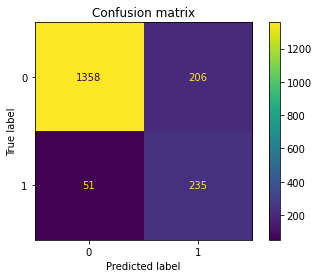

In [26]:
plot_confusion_matrix(model, X_test, y_test) 
plt.title('Confusion matrix')
plt.show()

### 3.5 Смотрим на важности признаков

Обычно говорят, что смотреть на важности признаков по MDI не очень корректно, так как это может искусственно завышать важности признаков с большим количеством уникальных значений, и лучше смотреть на пермутации. Предлагаю сделать и так, и так, воспользовавшись кодом из sklearn.

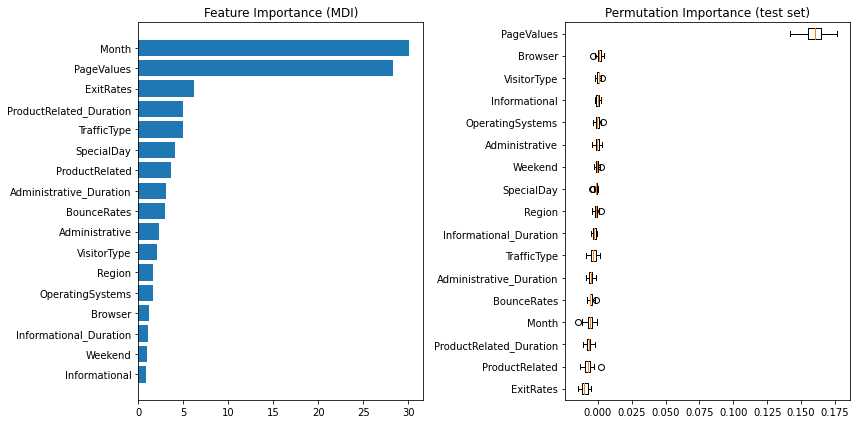

In [27]:
from sklearn.inspection import permutation_importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, y_test, n_repeats=50, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

### 3.6 Возможные варианты для улучшения модели

В рамках тестового задания я это делать не буду, так как займет время как мое, так и проверяющего, но в целом можно сделать следующее:

1) Все же применить UnderSampler. Это с большой вероятностью повысит f1 для минорного класса, но мы лишимся ценных данных

2) Попробовать обучить модель на урезанном количестве признаков. Я не думаю, что это даст значимый прирост в качестве, так как шума в данных достаточно мало

3) Тюнинг гиперпараметров. Опять же, обычно сильного прироста в библиотеках бустинга это не дает, так как авторы этих библиотек старались, чтобы все хорошо работало и с дефолтными параметрами

4) Выбор других моделей. Мне кажется, бустинг тут удачный выбор, особенно CatBoost с его обработкой категориальных признаков. Я видел в одном ноутбуке пользователь обучал на этих данных NBC и SVM - у него f1 score на минорном классе был ниже, правда тестовая выборка была чуть больше, то есть сравнивать результаты не очень корректно.

# 4 Краткие выводы

1) Несмотря на то, что мы ввели сбалансированные веса классов, модель все же гораздо лучше предсказывает большой нулевой класс

2) Тем не менее recall на минорном классе достаточно большой (больше 0.8). При этом по confusion matrix видно, что модель не так редко предсказывает класс 1 там, где на самом деле нулевой класс. Это в принципе нормально, так как наша задача - проанализировать, что влияет на решение пользователя о покупке. Учитывая то, что модель в целом хорошая (по усредненному f1 и Roc-Auc - 0.87, и 0.93, соответственно), у нас будет больше данных для анализа

3) Несомненно самый важный признак - PageValues, что является косвенным описанием таргета. По сравнению с ним, другие признаки не так важны, но как минимум большинство из них я бы не выкидывал из анализа, так как там либо есть корреляция с таргетом, либо можно установить какую-то связь с ним, либо они просто имеют смысл исходя из общей логики

4) Очень разные результаты, в зависимости от способа интерпретации признаков. То, что оказывается в топе по критерию Джини, оказывается внизу по пермутациям

5) Вспомним мою последнюю гипотезу 7) о том, что не все факторы важны. Я преимущественно говорил о браузере и операционной системе. Гипотеза не отвергается, так как по критерию Джини это одни из наименее важных признаков, а по критерию пермутации там вообще почти ничего не важно.

# Источники

1) https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html - про важности признаков

2) https://catboost.ai - документация CatBoost

3) https://www.kaggle.com/datasets/henrysue/online-shoppers-intention - датасет, который использовался для задания

4) https://github.com/AlgazinovAleksandr?tab=repositories - некоторые части кода взяты из моих старых скриптов

# Приложение: описание датасета:

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction. 

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.